<a href="https://colab.research.google.com/github/Olfatalatas/Pokemon-Combat-Power-Analysis/blob/main/Pokemon_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Combat Power sebagai variabel dependen (Y), dan statistik lain sebagai variabel independen (X).

In [ ]:
# 1. Import library dan baca dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

df = pd.read_csv('pokemon.csv')
df = df[['Name','Combat Power', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].dropna()
df.head()


,Name,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,Charmander,309,39,52,43,60,50,65
4,Charmeleon,405,58,64,58,80,65,80


Untuk memahami hubungan antara masing-masing variabel X dengan Y (Combat Power), kita membuat scatter plot. Tujuannya adalah melihat apakah ada pola linier di antara masing-masing variabel.

Yang dimana grafik ini menunjukkan bahwa semua X memiliki hubungan positif dengan Y (Combat Power).

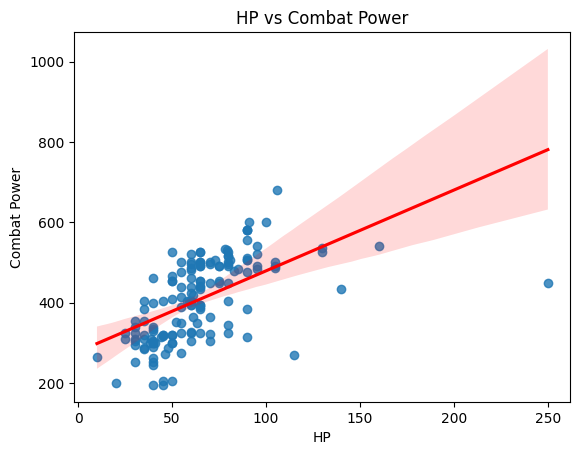

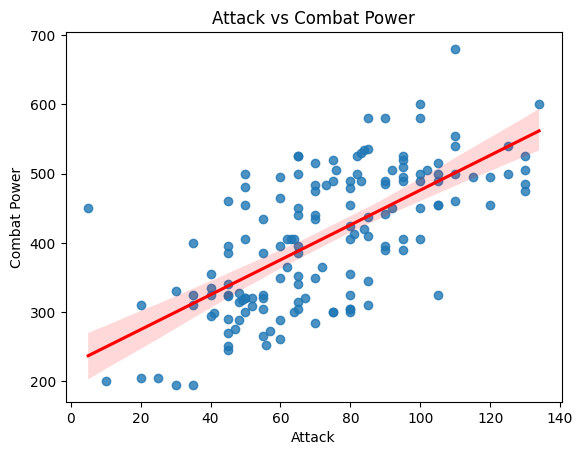

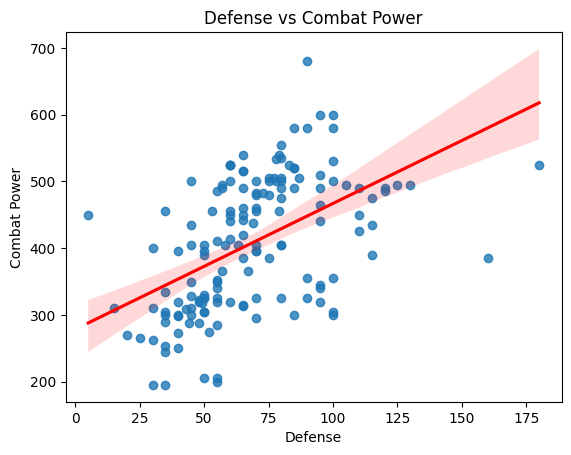

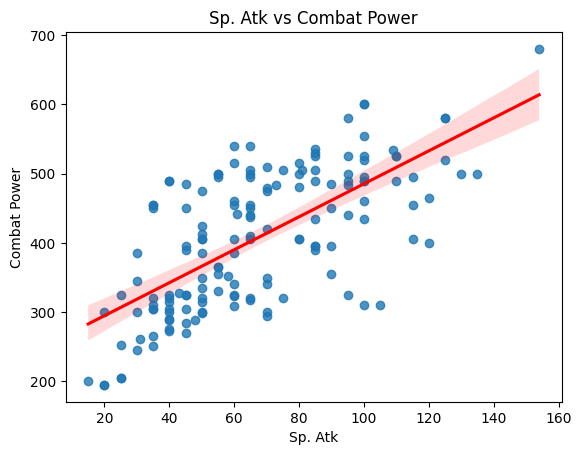

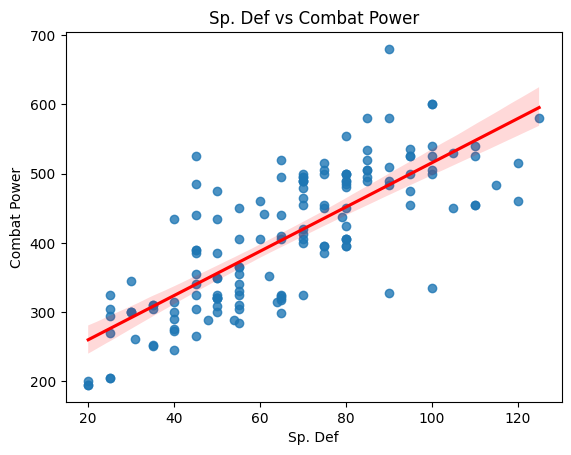

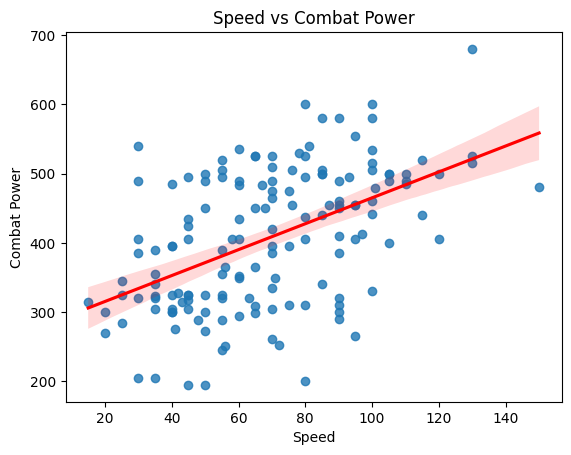

In [ ]:
# 2. Visualisasi Scatter Plot terhadap Combat Power
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for col in features:
    sns.regplot(x=df[col], y=df['Combat Power'], line_kws={"color": "red"})
    plt.title(f'{col} vs Combat Power')
    plt.xlabel(col)
    plt.ylabel('Combat Power')
    plt.show()


Kita menggunakan heatmap korelasi untuk melihat hubungan antar variabel. Nilai korelasi berkisar antara -1 hingga 1:

Semakin mendekati 1 atau -1 berarti hubungan linier yang kuat.

Semakin mendekati 0 berarti hubungan lemah.

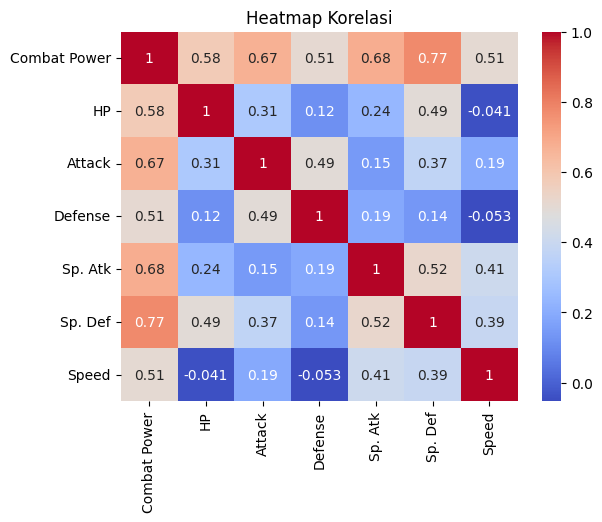

In [ ]:
# 3. Korelasi antar variabel
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()




Intercept: nilai Y saat semua X = 0.

Coefficients: menunjukkan pengaruh masing-masing X terhadap Y.

R-squared: seberapa baik model menjelaskan variasi Y (semakin mendekati 1, semakin baik).

MAE & MSE: mengukur seberapa jauh prediksi dari nilai sebenarnya.

In [ ]:
# 4. Regresi Linier Berganda
X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Combat Power']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print('R-squared:', r2_score(y, y_pred))
print('MAE:', mean_absolute_error(y, y_pred))
print('MSE:', mean_squared_error(y, y_pred))


Intercept: 0.390062887223678
Coefficients: [0.99764198 1.00640126 0.99576511 1.00327924 1.00041001 0.98945519]
R-squared: 0.9999397877792815
MAE: 0.2510000682022014
MSE: 0.5950742057945915


R-squared dan Adj. R-squared: tingkat kesesuaian model.

P>|t|: nilai signifikansi. Jika < 0.05, maka variabel X signifikan memengaruhi Y.

coef: nilai koefisien regresi.

std err: standar error masing-masing koefisien.

In [ ]:
# 5. Uji Signifikansi Model (OLS)
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:           Combat Power   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.986e+05
Date:                Wed, 21 May 2025   Prob (F-statistic):          3.70e-301
Time:                        15:32:43   Log-Likelihood:                -175.07
No. Observations:                 151   AIC:                             364.1
Df Residuals:                     144   BIC:                             385.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3901      0.283      1.376      0.1

Berdasarkan hasil yang saya peroleh,

Nilai R-squared yang tinggi (mendekati 1) menunjukkan bahwa model mampu menjelaskan sebagian besar variasi dari Combat Power berdasarkan variabel prediktor seperti HP, Attack, Defense, Sp. Atk, Sp. Def, dan Speed.

Koefisien regresi menunjukkan arah dan kekuatan pengaruh masing-masing variabel terhadap Combat Power:

Koefisien positif menunjukkan bahwa peningkatan nilai variabel tersebut akan meningkatkan nilai Combat Power.

Sebaliknya, koefisien negatif (jika ada) menunjukkan hubungan yang berlawanan.

Nilai p (P>|t|) dari hasil OLS menunjukkan bahwa sebagian besar variabel prediktor memiliki nilai p di bawah 0.05, yang berarti variabel-variabel tersebut signifikan secara statistik dalam memengaruhi Combat Power maka Hipotesis saya adalah berhasil menolak H0

Model regresi ini layak digunakan untuk memprediksi Combat Power Pokémon berdasarkan statistik individual karena nilai error (MAE dan MSE) cukup rendah, dan hasil regresi konsisten.